In [1]:
import yfinance as yf
Data = 'AMZN'
start_date = '2022-01-01'
end_date = '2023-01-01'
amazon_data = yf.download(Data, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [2]:
amazon_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000
...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600


In [4]:
amazon_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Price change over time


In [5]:
amazon_data['Price Change'] = amazon_data['Adj Close'].diff()

amazon_data


,Open,High,Low,Close,Adj Close,Volume,Price Change
Date,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009
2022-01-06,163.450500,164.800003,161.936996,163.253998,163.253998,51958000,-1.102997
2022-01-07,163.839005,165.243500,162.031006,162.554001,162.554001,46606000,-0.699997
...,...,...,...,...,...,...,...
2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700,1.459999
2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000,-2.209999
2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600,-1.220001


# visualization of Amazon stock price change,volume,moving average over time

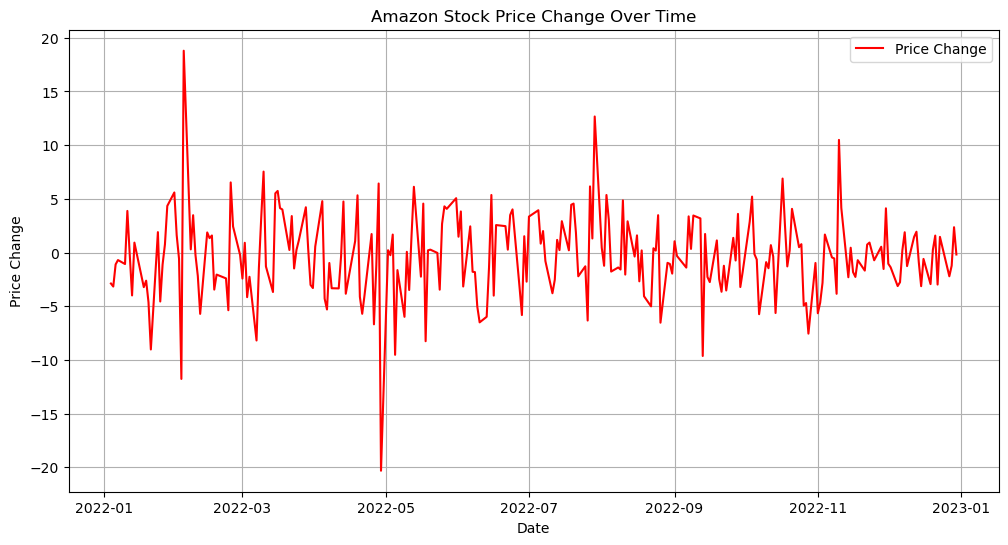

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Price Change'], label='Price Change', color='r')
plt.title('Amazon Stock Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.legend()
plt.grid(True)
plt.show()

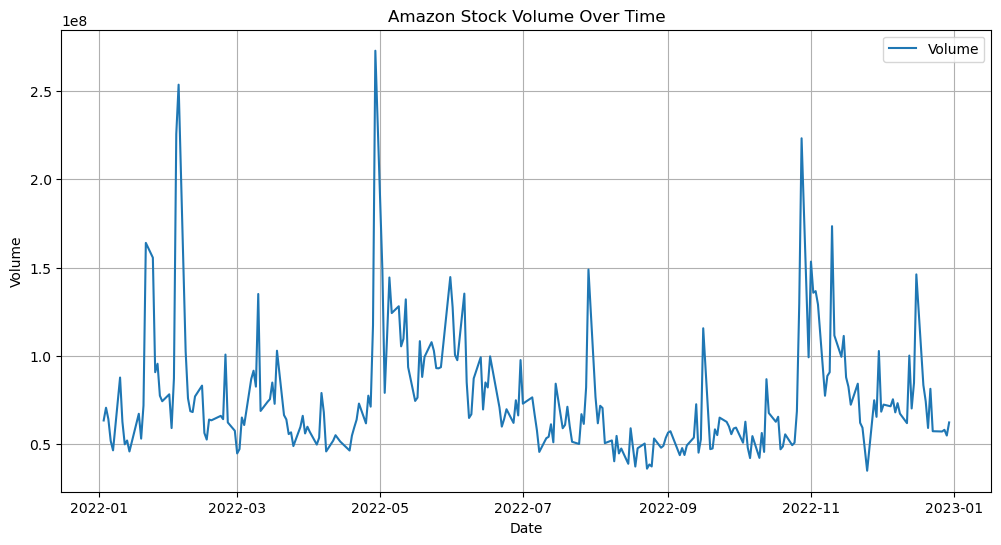

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Volume'], label='Volume')
plt.title('Amazon Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()


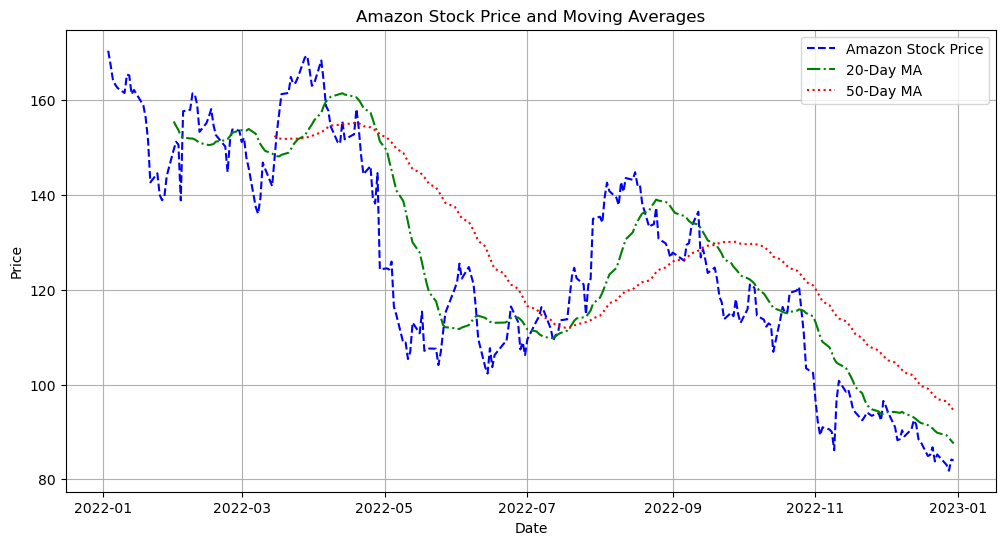

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Adj Close'], label='Amazon Stock Price',linestyle= "--", color='b')
plt.plot(amazon_data.index, amazon_data['20-Day MA'], label='20-Day MA',linestyle= "-." , color='g')
plt.plot(amazon_data.index, amazon_data['50-Day MA'], label='50-Day MA',linestyle= ":" , color='r')
plt.title('Amazon Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


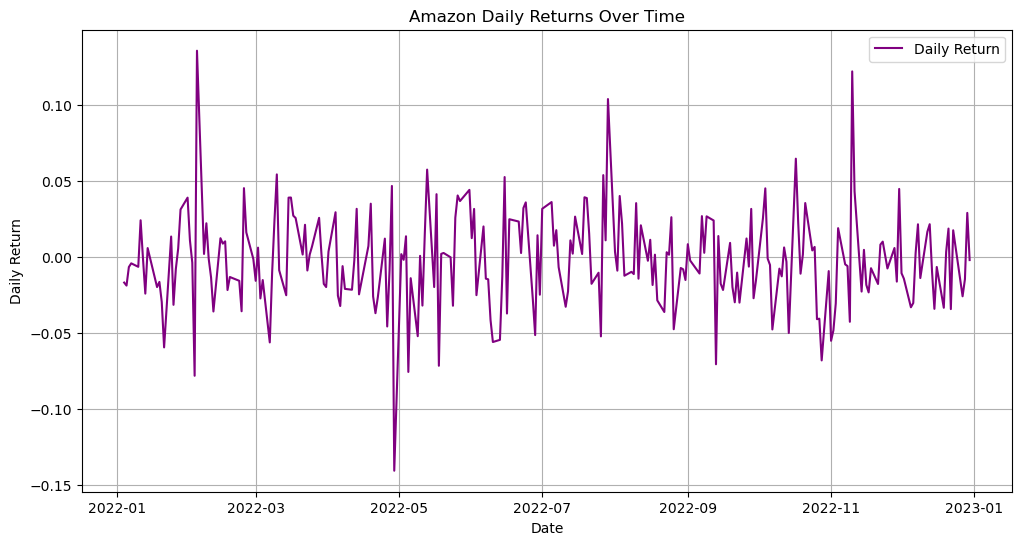

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(amazon_data.index, amazon_data['Daily Return'], label='Daily Return', color='purple')
plt.title('Amazon Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.grid(True)
plt.show()


# moving average over time

In [33]:
amazon_data['20-Day MA'] = amazon_data['Adj Close'].rolling(window=20).mean()
amazon_data['50-Day MA'] = amazon_data['Adj Close'].rolling(window=50).mean()

amazon_data.head(3)


,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA,Daily Return,Trend
Date,,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN,Neutral
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN,-0.016916,Down
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN,-0.018893,Down


# daily return average

In [10]:
amazon_data['Daily Return'] = amazon_data['Adj Close'].pct_change()

amazon_data.head(3)


,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA,Daily Return
Date,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN,-0.016916
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN,-0.018893


# Adding Trend column

In [11]:
amazon_data['Trend'] = ['Up' if x > 0 else 'Down' if x < 0 else 'Neutral' for x in amazon_data['Daily Return']]

amazon_data.head(3)

,Open,High,Low,Close,Adj Close,Volume,Price Change,20-Day MA,50-Day MA,Daily Return,Trend
Date,,,,,,,,,,,
2022-01-03,167.550003,170.703506,166.160507,170.404495,170.404495,63520000,NaN,NaN,NaN,NaN,Neutral
2022-01-04,170.438004,171.399994,166.349503,167.522003,167.522003,70726000,-2.882492,NaN,NaN,-0.016916,Down
2022-01-05,166.882996,167.126495,164.356995,164.356995,164.356995,64302000,-3.165009,NaN,NaN,-0.018893,Down


# pie chart of trend distribution

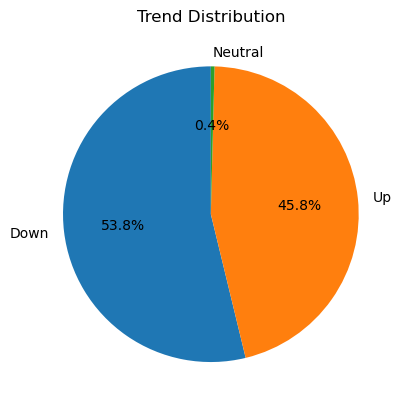

In [12]:
trend_counts = amazon_data['Trend'].value_counts()
plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Trend Distribution')
plt.show()


# Moving on to the combined anlysis

In [13]:

stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN']
stock_data = yf.download(stocks, start='2022-01-01', end='2023-01-01')

print(stock_data.head())

[*********************100%%**********************]  4 of 4 completed
             Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190979  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746704  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858734  172.000000   
2022-01-07  170.449341  162.554001  137.016998  309.016174  172.169998   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003

# Visualization of stocks price,volume and moving average over time

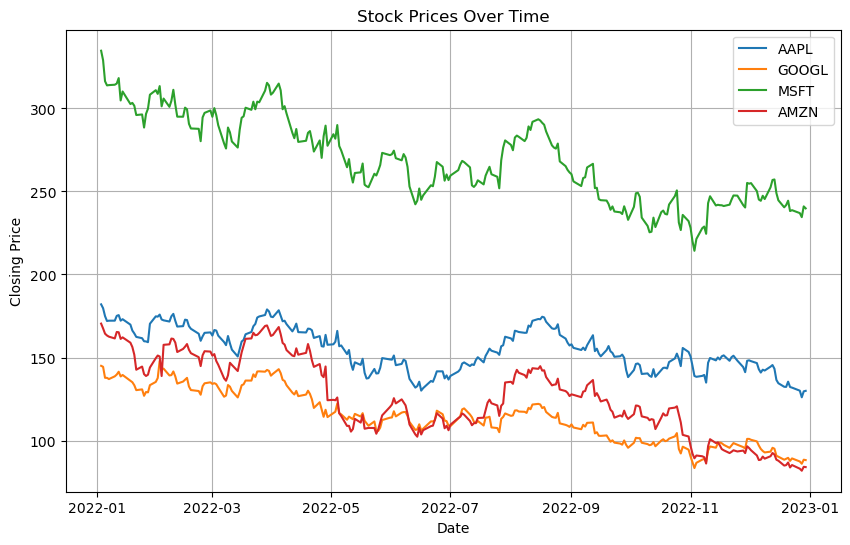

In [44]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.legend()
plt.show()

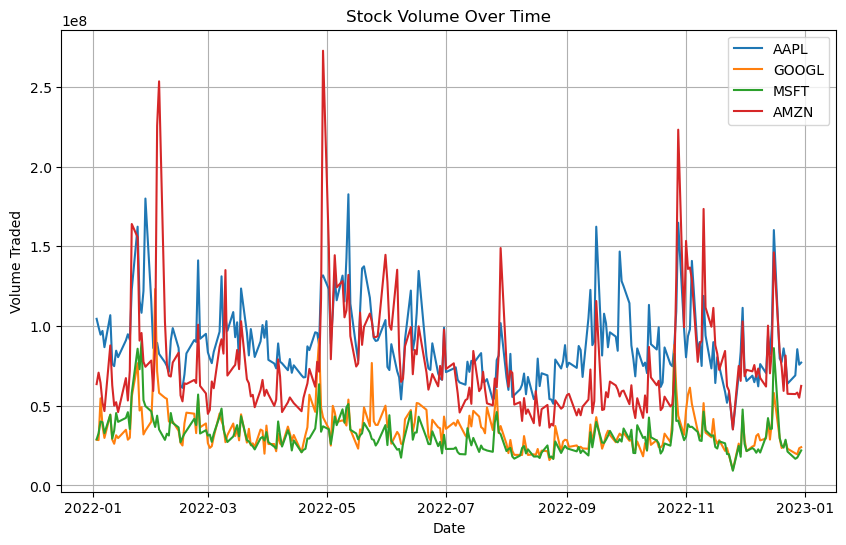

In [45]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Volume'][stock], label=stock)

plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.grid(True)
plt.legend()
plt.show()

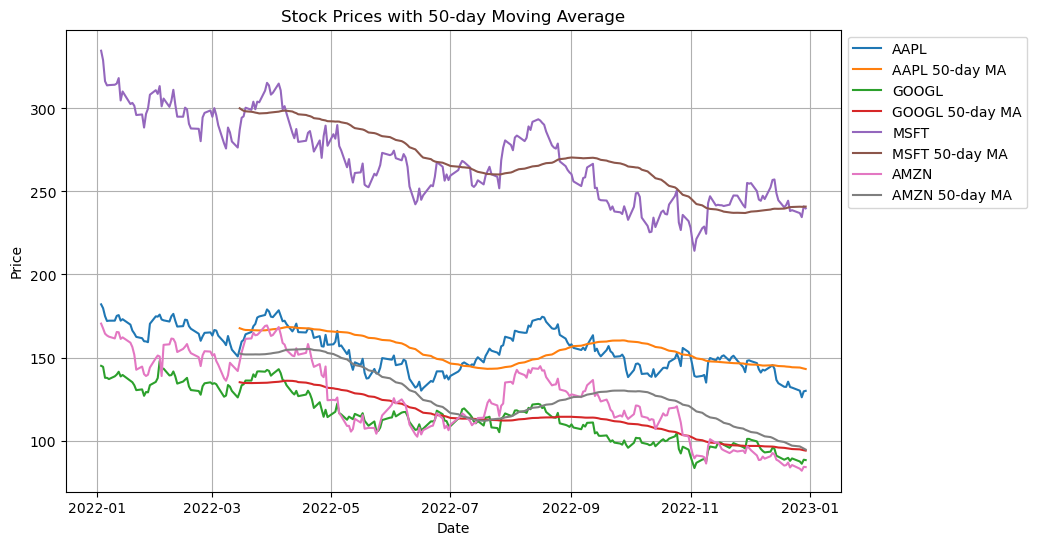

In [28]:
plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data['Close'][stock], label=stock)
    plt.plot(stock_data['Close'][stock].rolling(window=50).mean(), label=f'{stock} 50-day MA')

plt.title('Stock Prices with 50-day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend(bbox_to_anchor=(1,1))
plt.show()

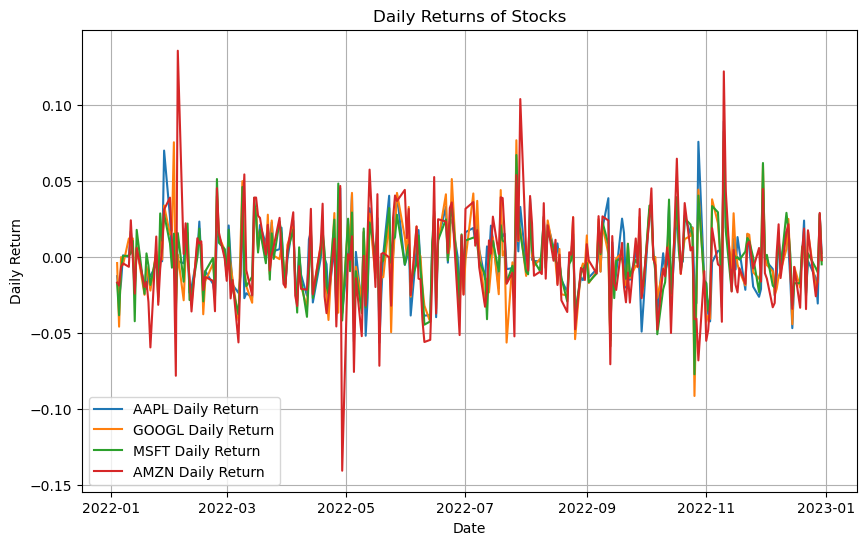

Maximum Daily Return for AAPL: 0.08897457132383879
Maximum Daily Return for GOOGL: 0.07655685747975283
Maximum Daily Return for MSFT: 0.08226805787098601
Maximum Daily Return for AMZN: 0.13535901735711864


In [31]:
for stock in stocks:
    stock_data[f'{stock}_Daily_Return'] = stock_data['Close'][stock].pct_change()

plt.figure(figsize=(10, 6))
for stock in stocks:
    plt.plot(stock_data[f'{stock}_Daily_Return'], label=f'{stock} Daily Return')

plt.title('Daily Returns of Stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.legend()
plt.show()
for stock in stocks:
    max_return = stock_data[f'{stock}_Daily_Return'].max()
    print(f'Maximum Daily Return for {stock}: {max_return}')

# Adding a Trend coloumn

In [20]:
for stock in stocks:
    stock_data[f'{stock}_Trend'] = ['Up' if x > 0 else 'Down' if x < 0 else 'Stable' for x in stock_data[f'{stock}_Daily_Return']]

stock_data.head(10)

Adj Close                                           Close  \
                  AAPL        AMZN       GOOGL        MSFT        AAPL   
Date                                                                     
2022-01-03  180.190979  170.404495  144.991501  329.394806  182.009995   
2022-01-04  177.904053  167.522003  144.399506  323.746704  179.699997   
2022-01-05  173.171844  164.356995  137.774994  311.318756  174.919998   
2022-01-06  170.281021  163.253998  137.747498  308.858734  172.000000   
2022-01-07  170.449341  162.554001  137.016998  309.016174  172.169998   
2022-01-10  170.469131  161.485992  138.669495  309.242462  172.190002   
2022-01-11  173.330231  165.362000  139.735992  309.941132  175.080002   
2022-01-12  173.775726  165.207001  141.430496  313.178497  175.529999   
2022-01-13  170.469131  161.214005  138.587006  299.923950  172.190002   
2022-01-14  171.340332  162.138000  139.480499  305.237640  173.070007   

                                                      High              ...  \
                  AMZN       GOOGL        MSFT        AAPL        AMZN  ...   
Date                                                                    ...   
2022-01-03  170.404495  144.991501  334.750000  182.880005  170.703506  ...   
2022-01-04  167.522003  144.399506  329.010010  182.940002  171.399994  ...   
2022-01-05  164.356995  137.774994  316.380005  180.169998  167.126495  ...   
2022-01-06  163.253998  137.747498  313.880005  175.300003  164.800003  ...   
2022-01-07  162.554001  137.016998  314.040009  174.139999  165.243500  ...   
2022-01-10  161.485992  138.669495  314.269989  172.500000  161.661499  ...   
2022-01-11  165.362000  139.735992  314.980011  175.179993  166.350006  ...   
2022-01-12  165.207001  141.430496  318.269989  177.179993  166.878006  ...   
2022-01-13  161.214005  138.587006  304.799988  176.619995  166.221497  ...   
2022-01-14  162.138000  139.480499  310.200012  173.779999  162.250000  ...   

              Volume           AAPL_Daily_Return GOOGL_Daily_Return  \
               GOOGL      MSFT                                        
Date                                                                  
2022-01-03  28646000  28865100               NaN                NaN   
2022-01-04  28400000  32674300         -0.012692          -0.004083   
2022-01-05  54618000  40054300         -0.026600          -0.045876   
2022-01-06  37348000  39646100         -0.016693          -0.000200   
2022-01-07  29760000  32720000          0.000988          -0.005303   
2022-01-10  44408000  44289500          0.000116           0.012061   
2022-01-11  28730000  29386800          0.016784           0.007691   
2022-01-12  26108000  34372200          0.002570           0.012126   
2022-01-13  31436000  45366000         -0.019028          -0.020105   
2022-01-14  29662000  39846400          0.005111           0.006447   

           MSFT_Daily_Return AMZN_Daily_Return AAPL_Trend GOOGL_Trend  \
                                                                        
Date                                                                    
2022-01-03               NaN               NaN     Stable      Stable   
2022-01-04         -0.017147         -0.016916       Down        Down   
2022-01-05         -0.038388         -0.018893       Down        Down   
2022-01-06         -0.007902         -0.006711       Down        Down   
2022-01-07          0.000510         -0.004288         Up        Down   
2022-01-10          0.000732         -0.006570         Up          Up   
2022-01-11          0.002259          0.024002         Up          Up   
2022-01-12          0.010445         -0.000937         Up          Up   
2022-01-13         -0.042323         -0.024170       Down        Down   
2022-01-14          0.017717          0.005731         Up          Up   

           MSFT_Trend AMZN_Trend  
                                  
Date                              
2022-01-03     Stable     Stable  
2022-01-

# Trend Distribution

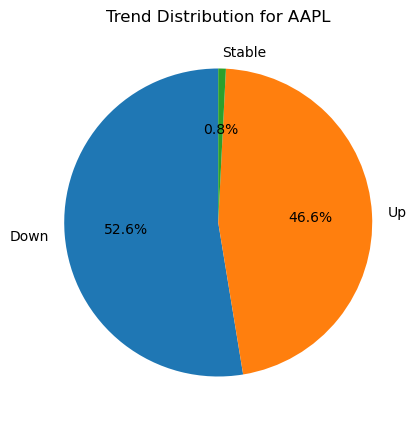

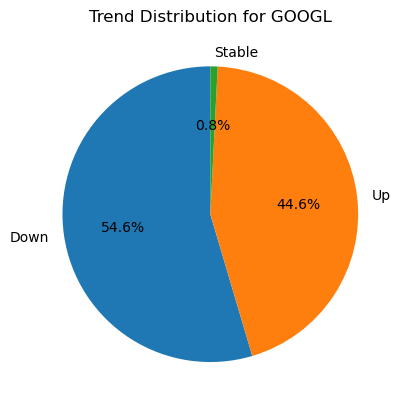

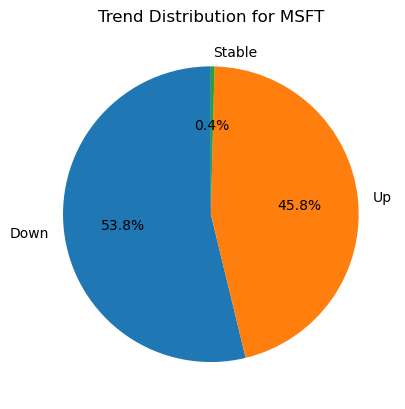

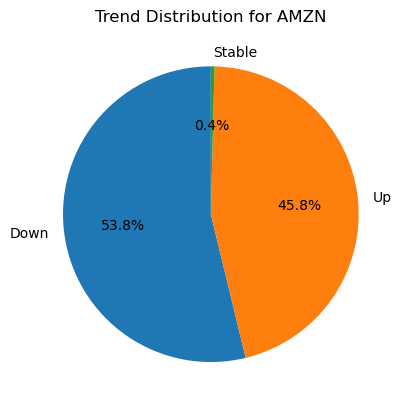

In [27]:
plt.figure(figsize=(5, 5))
for stock in stocks:
    trend_counts = stock_data[f'{stock}_Trend'].value_counts()
    plt.pie(trend_counts, labels=trend_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Trend Distribution for {stock}')
    plt.show()

# Correlation Between Daily Returns of Stocks

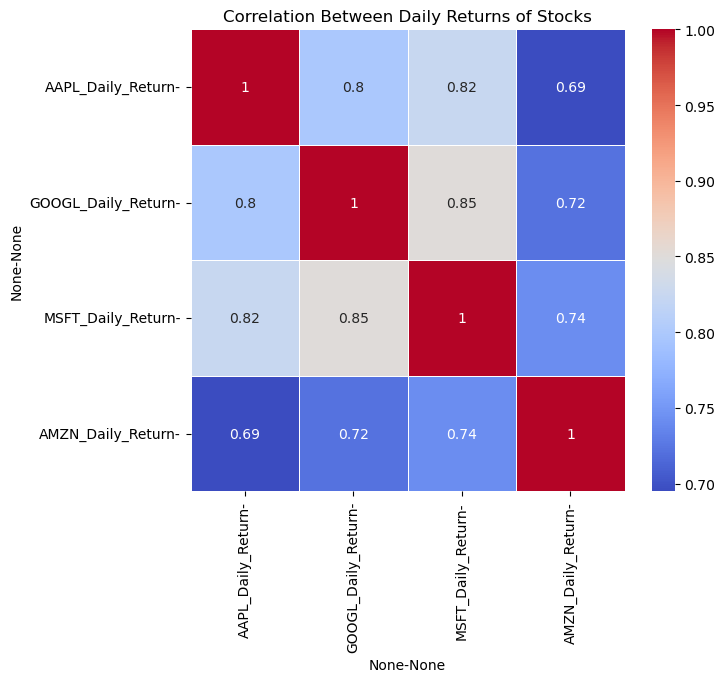

In [26]:
import seaborn as sns

daily_returns = stock_data[[f'{stock}_Daily_Return' for stock in stocks]]
correlation_matrix = daily_returns.corr()
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Between Daily Returns of Stocks')
plt.show()

In [ ]:
By Shreya Ghosal